# Within Top 10% with Simple Regression Model.

# Step By Step Procedure To Predict House Price

# Importing packages
We have **numpy** and **pandas** to work with numbers and data, and we have **seaborn** and **matplotlib** to visualize data. We would also like to filter out unnecessary warnings. **Scipy** for normalization and skewing of data.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Settings
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 4)
pd.options.display.max_columns = 500

# Loading and Inspecting data
With various Pandas functions, we load our training and test data set as well as inspect it to get an idea of the data we're working with. This is a large dataset we will be working on.


In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train_df_org = pd.read_csv('house_prices_train.csv')
test_df_org = pd.read_csv('house_prices_test.csv')

# train set dimension
print('Train dataset dimension: {} rows, {} columns'.format(train_df_org.shape[0], train_df_org.shape[1]))

# test set dimension
print('Test dataset dimension: {} rows, {} columns'.format(test_df_org.shape[0], test_df_org.shape[1]))

print('First few observations of AMES housing prices train dataset: ')
train_df_org.head()

Train dataset dimension: 1460 rows, 81 columns
Test dataset dimension: 1459 rows, 80 columns
First few observations of AMES housing prices train dataset: 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Metadata of Titatnic dataset
object_col_names = train_df_org.select_dtypes(include=[np.object]).columns.tolist()
int_col_names = train_df_org.select_dtypes(include=[np.int64]).columns.tolist()
float_col_names = train_df_org.select_dtypes(include=[np.float64]).columns.tolist()
target_var = 'SalesPrice'

num_col_names = int_col_names + float_col_names
total_col_names = object_col_names + int_col_names + float_col_names

if len(total_col_names) == train_df_org.shape[1]:
    print('Number of Features count matching. Train Dataset Features: ', train_df_org.shape[1], ' Features Count: ', len(total_col_names))
else:
    print('Number of Features count not matching. Train Dataset Features: ', train_df_org.shape[1], ' Features Count: ', len(total_col_names))

print('\nTotal number of object features: ', len(object_col_names))
print(object_col_names)

print('\nTotal number of integer features: ', len(int_col_names))
print(int_col_names)

print('\nTotal number of float features: ', len(float_col_names))
print(float_col_names)

Number of Features count matching. Train Dataset Features:  81  Features Count:  81

Total number of object features:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Total number of integer features:  35
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Be

In [4]:
train_df_org.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


> That is a very large data set! We are going to have to do a lot of work to clean it up

**Drop the Id column because we dont need it currently.**

In [5]:
train_df_proc = train_df_org.copy()
test_df_proc = test_df_org.copy()

#Save the 'Id' column
train_ID = train_df_proc['Id']
test_ID = test_df_proc['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df_proc.drop("Id", axis = 1, inplace = True)
test_df_proc.drop("Id", axis = 1, inplace = True)

# train set dimension
print('Size of train dataset after dropping Id: {} rows, {} columns'.format(train_df_proc.shape[0], train_df_proc.shape[1]))

# test set dimension
print('Size of train dataset after dropping Id: {} rows, {} columns'.format(test_df_proc.shape[0], test_df_proc.shape[1]))

Size of train dataset after dropping Id: 1460 rows, 80 columns
Size of train dataset after dropping Id: 1459 rows, 79 columns


## Dealing with outliers

Outlinear in the GrLivArea is recommended by the author of the data  to remove it. The author says in documentation “I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.”


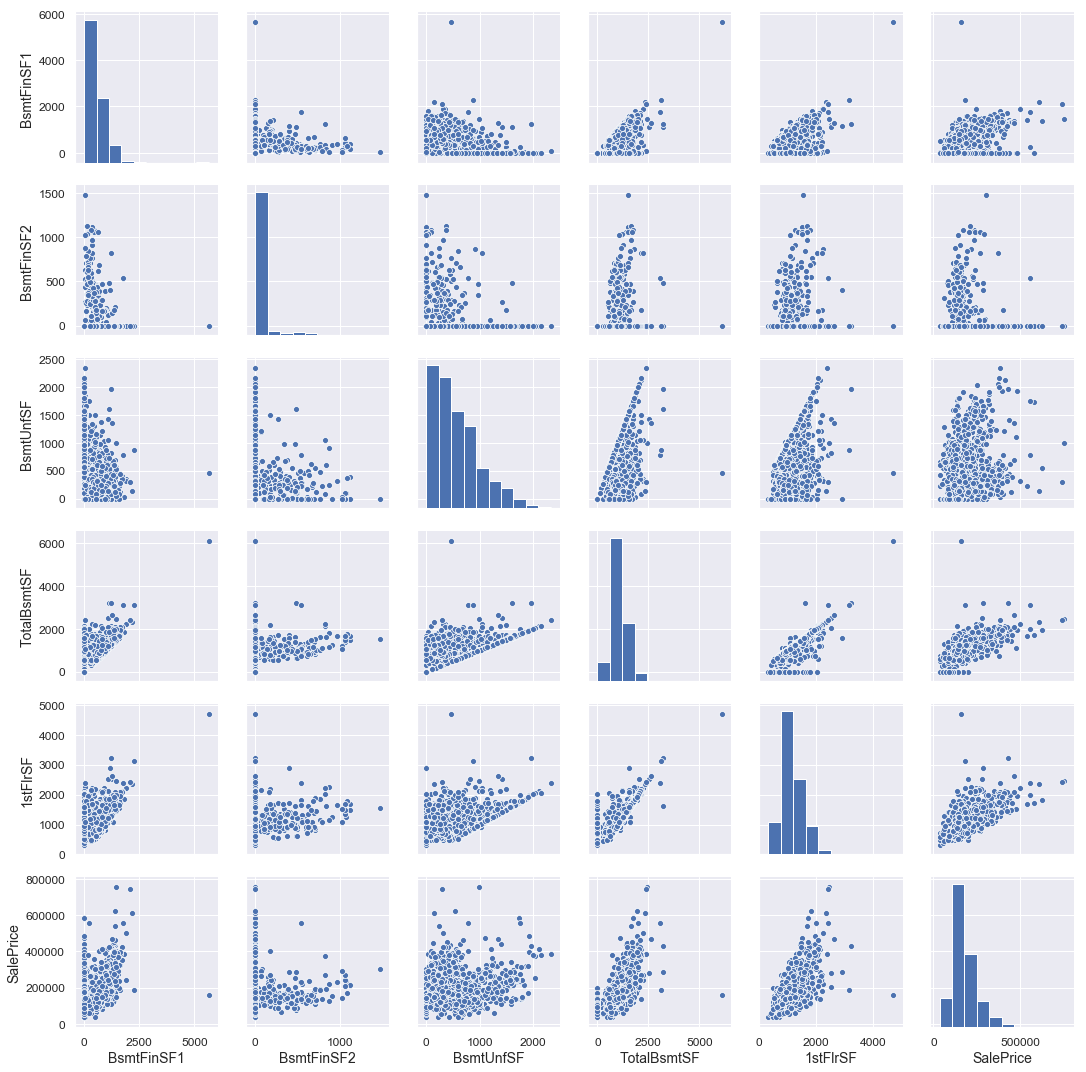

In [6]:
# Create the default pairplot
plot_cols1 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']
plot_cols2 = ['GrLivArea','LotArea', 'PoolArea', 'GarageArea', '2ndFlrSF', 'SalePrice']

sns.pairplot(train_df_proc[plot_cols1]);

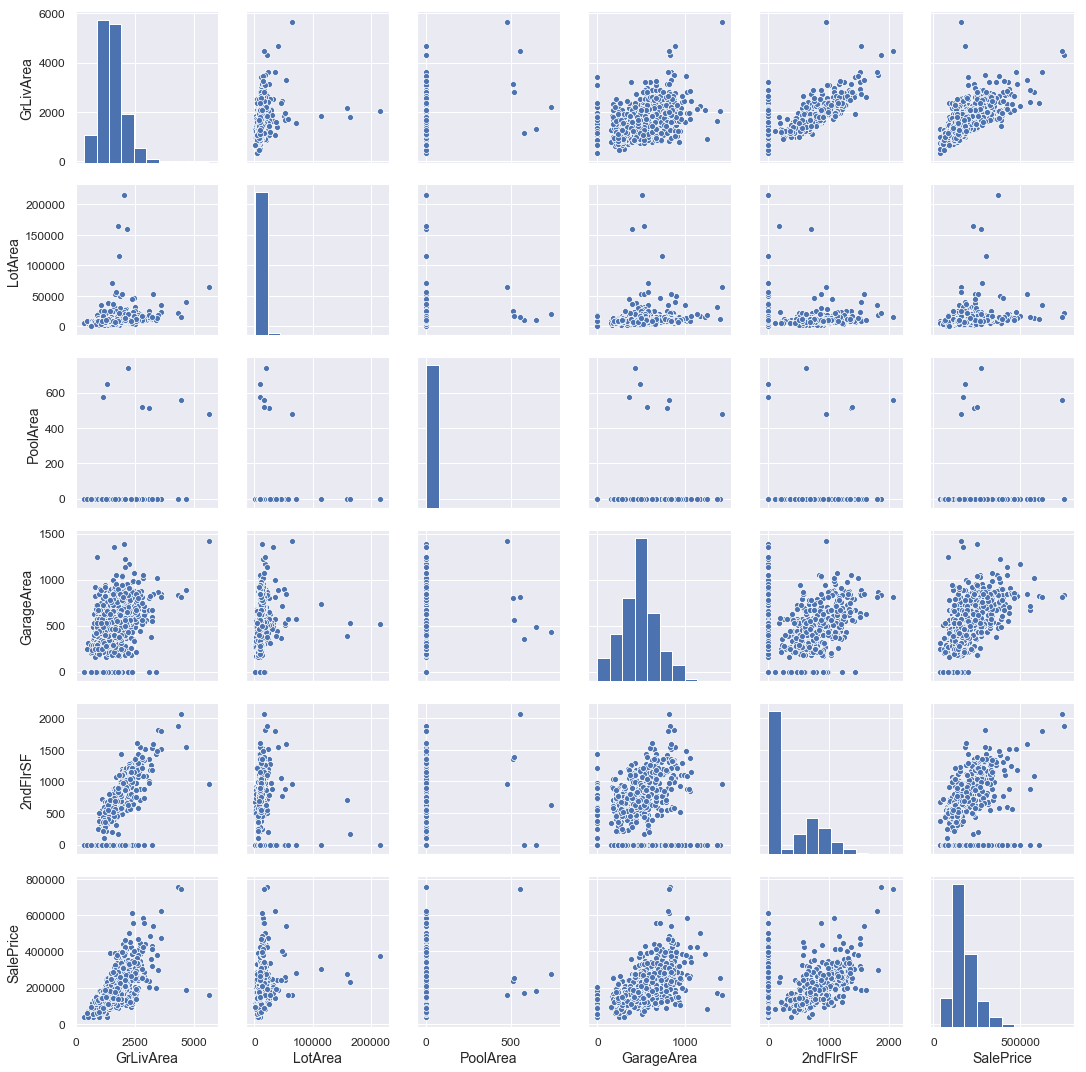

In [7]:
sns.pairplot(train_df_proc[plot_cols2]);

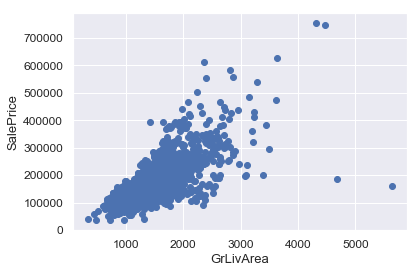

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train_df_proc['GrLivArea'], y = train_df_proc['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show();

We can see that there are outlinear with low SalePrice and high GrLivArea. This looks odd.
We need to remove it.

In [9]:
train_df_proc[(train_df_proc['GrLivArea']>4000) & (train_df_proc['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [10]:
#Deleting outliers
train_df_proc = train_df_proc.drop(train_df_proc[(train_df_proc['GrLivArea']>4000) & (train_df_proc['SalePrice']<300000)].index)

## Correlation Analysis

Let see the most correlated features.

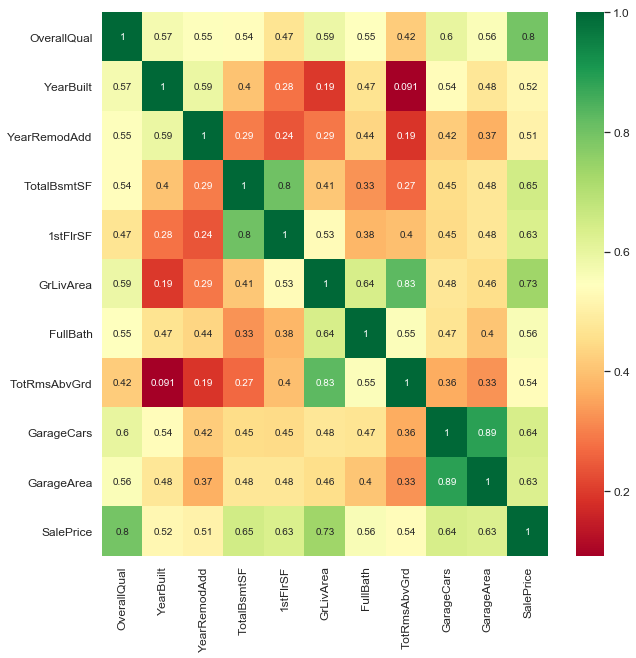

In [11]:
# most correlated features
corrmat = train_df_proc.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df_proc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- From this we can tell which features **(OverallQual, GrLivArea and TotalBsmtSF )** are highly positively correlated with the SalePrice. 
- **GarageCars and GarageArea ** also seems correlated with other, Since the no. of car that will fit into the garage will depend on GarageArea. 

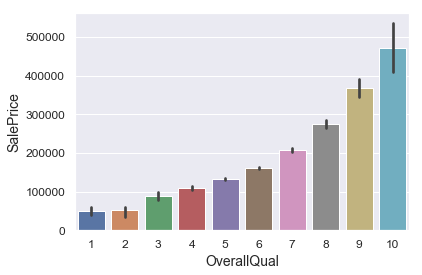

In [12]:
sns.barplot(train_df_proc.OverallQual,train_df_proc.SalePrice);

**Scatter plots between 'SalePrice' and correlated variables**

C:\Users\ajana\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


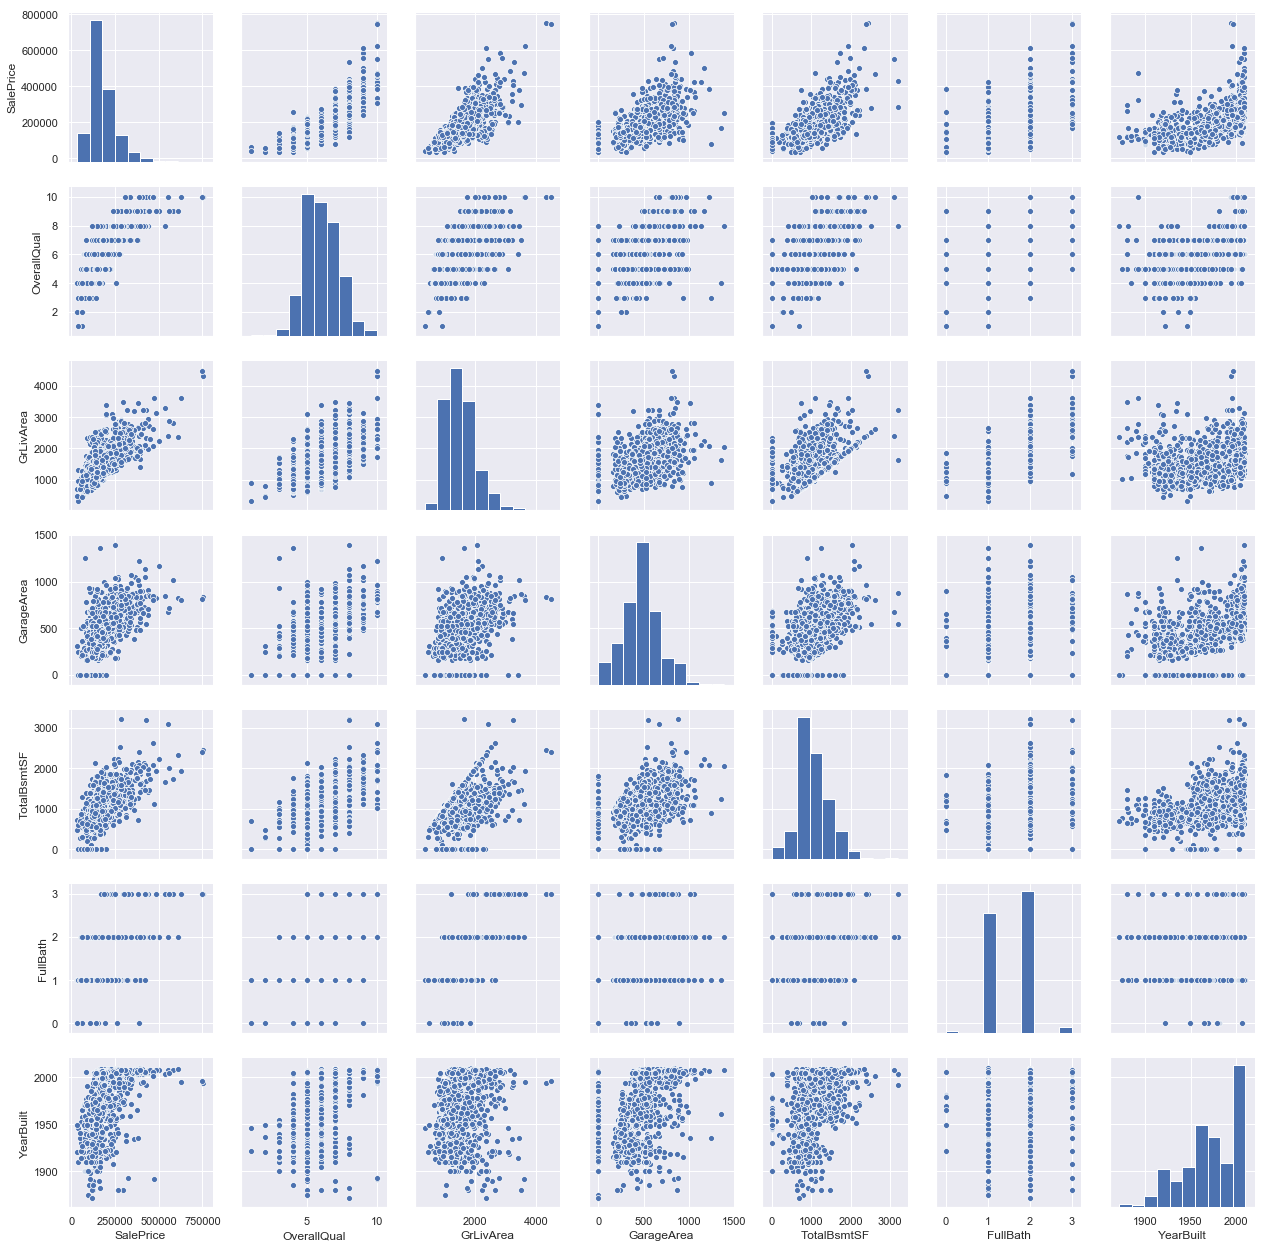

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df_proc[cols], size = 2.5)
plt.show();

## Target Variable Transform
Different features in the data set may have values in different ranges. For example, in this data set, the range of SalePrice feature may lie from thousands to lakhs but the range of values of YearBlt feature will be in thousands. That means a column is more weighted compared to other.

**Lets check the skewness of data**
![Skew](https://cdn-images-1.medium.com/max/800/1*hxVvqttoCSkUT2_R1zA0Tg.gif)


 mu = 180932.92 and sigma = 79467.79



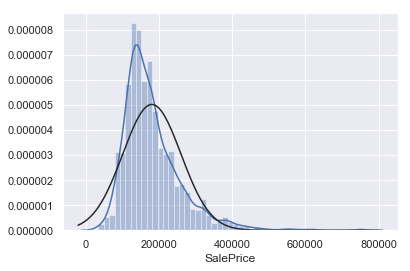

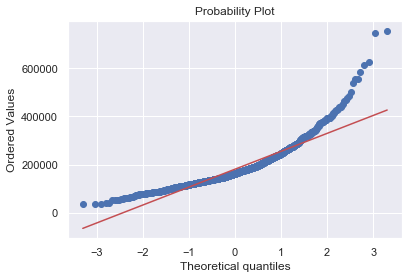

In [14]:
def check_skewness(col):
    sns.distplot(train_df_proc[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train_df_proc[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train_df_proc[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('SalePrice')

**This distribution is positively skewed.** Notice that the black curve is more deviated towards the right. If you encounter that your predictive (response) variable is skewed, it is **recommended to fix the skewness** to make good decisions by the model.

## Okay, So how do I fix the skewness?
The best way to fix it is to perform a **log transform** of the same data, with the intent to reduce the skewness.


 mu = 12.02 and sigma = 0.40



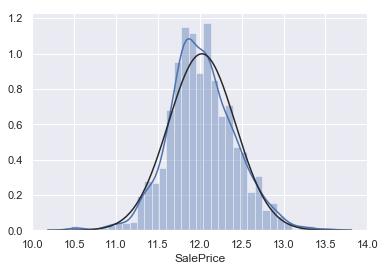

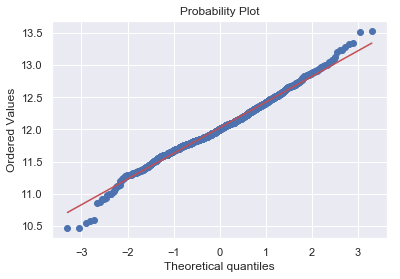

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df_proc["SalePrice"] = np.log1p(train_df_proc["SalePrice"])

check_skewness('SalePrice')

After taking logarithm of the same data the curve seems to be normally distributed, although not perfectly normal, this is sufficient to fix the issues from a skewed dataset as we saw before.

**Important : If you log transform the response variable, it is required to also log transform feature variables that are skewed.**

# Feature Engineering

Here is the [Documentation](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) you can refer , to know more about the dataset.

**Concatenate both train and test values.**

In [16]:
ntrain = train_df_proc.shape[0]
ntest = test_df_proc.shape[0]
y_train = train_df_proc.SalePrice.values
all_df = pd.concat((train_df_proc, test_df_proc)).reset_index(drop=True)
all_df.drop(['SalePrice'], axis=1, inplace=True)

print('Size of train & test dataset comined: {} rows, {} columns'.format(all_df.shape[0], all_df.shape[1]))

Size of train & test dataset comined: 2917 rows, 79 columns


# Missing Data

Total number of features having null values:  34
Name of features having null values:  Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'Electrical', 'Exterior2nd',
       'KitchenQual', 'GarageCars', 'Exterior1st', 'GarageArea', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'SaleType'],
      dtype='object')


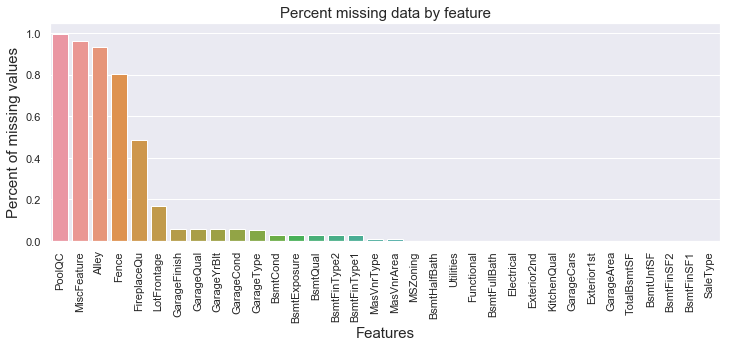

In [17]:
null_feat_df = pd.DataFrame()
null_feat_df['Null Count'] = all_df.isnull().sum().sort_values(ascending=False)
null_feat_df['Null Pct'] = null_feat_df['Null Count'] / float(len(all_df))

null_feat_df = null_feat_df[null_feat_df['Null Pct'] > 0]

total_null_feats = null_feat_df.shape[0]
null_feat_names = null_feat_df.index
print('Total number of features having null values: ', total_null_feats)
print('Name of features having null values: ', null_feat_names)

f, ax = plt.subplots(figsize=(12, 4))
plt.xticks(rotation='90')
sns.barplot(x=null_feat_df.index, y=null_feat_df['Null Pct'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15);

**GarageType,  GarageFinish, GarageQual,  GarageCond, GarageYrBlt,  GarageArea,  GarageCars  these all features have same percentage of null values.**

# Handle Missing Data

Since PoolQC has the highest null values according to the data documentation says **null values means 'No Pool.**
Since majority of houses has no pool.
So we will replace those null values with 'None'.

In [18]:
none_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'KitchenQual',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in none_col:
    all_df[none_col] = all_df[none_col].fillna('None')

zero_col = ['GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']
for col in zero_col:
    all_df[col] = all_df[col].fillna(0)

mode_col = ['MSZoning', 'Exterior1st', 'Exterior2nd']
for col in mode_col:
    all_df[col] = all_df[col].fillna(all_df[col].mode()[0])

other_col = ['Functional', 'Utilities', 'Electrical', 'SaleType', 'LotFrontage', 'GarageYrBlt']
all_df['Functional'] = all_df['Functional'].fillna('Typ')
all_df['Utilities'] = all_df['Utilities'].fillna('AllPub')
#all_df['MSSubClass'] = all_df['MSSubClass'].fillna(190)
all_df['Electrical'] = all_df['Electrical'].fillna('SBrkr')
all_df['SaleType'] = all_df['SaleType'].fillna('Oth')
#all_df['GarageYrBlt'] = all_df['GarageYrBlt'].fillna(all_df['YearBuilt'])
all_df['GarageYrBlt'] = all_df['GarageYrBlt'].fillna(0)

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

total_impute_cols = none_col + zero_col + mode_col + other_col

if len(null_feat_names) == len(total_impute_cols):
    print('Number of Null Features count matching. Null Features: ', len(null_feat_names), ' Imputed Features: ', len(total_impute_cols))
    print(set(null_feat_names) - set(total_impute_cols))
else:
    print('Number of Null Features count not matching. Null Features: ', len(null_feat_names), ' Imputed Features: ', len(total_impute_cols))
    print(set(total_impute_cols) - set(null_feat_names))

Number of Null Features count matching. Null Features:  34  Imputed Features:  34
set()


* **MiscFeature** : Data documentation says NA means "no misc feature"

* **Alley** : data description says NA means "no alley access"


* **Fence** : data description says NA means "no fence"


* **FireplaceQu** : data description says NA means "no fireplace"

* **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [19]:
# Grouping by Neighborhood and Check the LotFrontage. Most of the grouping has similar areas
#grouped_df = all_data.groupby('Neighborhood')['LotFrontage']

#for key, item in grouped_df:
#    print(key,"\n")
#    print(grouped_df.get_group(key))
#    break

* **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None as per documentation. 

* **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

* **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

* **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

* **Functional** : data description says NA means typical

* **Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleType** : Since this all are categorical values so its better to replace nan values with the most used keyword.

* **MSSubClass** : Na most likely means No building class. We can replace missing values with None


## Lets check for any missing values

In [20]:
null_feat_df = pd.DataFrame()
null_feat_df['Null Count'] = all_df.isnull().sum().sort_values(ascending=False)
null_feat_df['Null Pct'] = null_feat_df['Null Count'] / float(len(all_df))

null_feat_df = null_feat_df[null_feat_df['Null Pct'] > 0]

total_null_feats = null_feat_df.shape[0]
null_feat_names = null_feat_df.index
print('Total number of features having null values: ', total_null_feats)
print('Name of features having null values: ', null_feat_names)

Total number of features having null values:  0
Name of features having null values:  Index([], dtype='object')


In [21]:
# Basic statistics of categorical features
all_df.describe(include=[np.object])

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917
unique,3,5,5,5,7,7,5,2,9,8,5,5,4,15,16,5,6,6,7,6,4,6,7,6,5,8,5,4,3,5,4,5,4,5,25,3,4,7,6,6,9,2,2
top,None,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,None,None,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,None,NAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
freq,2719,2423,2604,1904,851,2491,1283,2721,2511,2888,2670,2536,1798,1026,1015,2346,1420,1306,2717,2652,1230,2602,1722,2872,1491,1471,1492,2622,2776,2132,1859,2267,1766,2812,443,2639,2908,2875,2310,2402,2525,2905,2916


* **Utilities** : Since this is a categorical data and most of the data are of same category, Its not gonna effect on model. So we choose to drop it.

In [22]:
all_df = all_df.drop(['Utilities'], axis=1)
print('Size of dataset after removing Utilities feature: {} rows, {} columns'.format(all_df.shape[0], all_df.shape[1]))

Size of dataset after removing Utilities feature: 2917 rows, 78 columns


In [23]:
# Basic statistics of categorical features
all_df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.00000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,1157.692492,335.861502,2.604045,2.860130,438.864930,49.599246,0.428865,0.061364,560.50360,23.114158,0.596160,1.567364,472.247515,1.765513,1870.270141,1498.251628,0.379842,1.044566,10139.439150,69.436064,4.697635,57.135756,100.931436,50.860816,6.213576,47.280082,5.564964,6.086390,2.088790,16.073363,6.448063,1048.967775,93.629414,1971.287967,1984.248200,2007.792938
std,385.264298,428.119663,25.196714,0.822967,444.180542,169.232130,0.523943,0.245687,439.69883,64.263424,0.644773,0.552465,214.762268,0.762102,449.826161,496.908626,0.502782,0.214532,7807.036512,21.208242,46.412570,42.532140,178.032499,567.595198,2.713070,67.118965,1.113414,1.406704,34.561371,56.202054,1.564281,429.472008,126.532643,30.286991,20.892257,1.315328
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.00000,0.000000,0.000000,1.000000,320.000000,1.000000,1957.000000,1126.000000,0.000000,1.000000,7476.000000,60.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.000000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.00000,0.000000,1.000000,2.000000,480.000000,2.000000,1977.000000,1444.000000,0.000000,1.000000,9452.000000,70.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,0.000000,6.000000,988.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1384.000000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,804.00000,0.000000,1.000000,2.000000,576.000000,2.000000,2001.000000,1743.000000,1.000000,1.000000,11556.000000,80.000000,0.000000,70.000000,163.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,4010.000000,1526.000000,3.000000,2.000000,2336.00000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5095.000000,2.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,576.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000,2010.000000


**Now there any many features that are numerical but categorical.**

**Converting some numerical variables that are really categorical type.**

As you can see the category range from 1 to 9 which are numerical (**not ordinal type**). Since its categorical we need to change it to String type.

If we do not convert these to categorical, some model may get affect by this as model will compare the value 1<5<10 . We dont need that to happen with our model.

In [24]:
#MSSubClass=The building class
all_df['MSSubClass'] = all_df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_df['OverallCond'] = all_df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_df['YrSold'] = all_df['YrSold'].astype(str)
all_df['MoSold'] = all_df['MoSold'].astype(str)

# Additional Attributes
#all_df['OverallQual'] = all_df['OverallQual'].astype(str)
#all_df['YearBuilt'] = all_df['YearBuilt'].astype(str)
#all_df['YearRemodAdd'] = all_df['YearRemodAdd'].astype(str)
#all_df['GarageYrBlt'] = all_df['GarageYrBlt'].astype(str)

## Label Encoding 
As you might know by now, we can’t have text in our data if we’re going to run any kind of model on it. So before we can run a model, we need to make this data ready for the model.

And to convert this kind of categorical text data into model-understandable numerical data, we use the Label Encoder class.

Suppose, we have a feature State which has 3 category i.e India , France, China . So, Label Encoder will categorize them as 0, 1, 2.

In [25]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'YrSold', 'MoSold',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond'] 
#        'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label_enc = LabelEncoder() 
    label_enc.fit(list(all_df[c].values)) 
    all_df[c] = label_enc.transform(list(all_df[c].values))

# shape        
print('Size of dataset after label encoding: {} rows, {} columns'.format(all_df.shape[0], all_df.shape[1]))

Size of dataset after label encoding: 2917 rows, 78 columns


Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [26]:
# Adding total sqfootage feature 
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']

**Lets see the highly skewed features we have**


Skew in numerical features: 



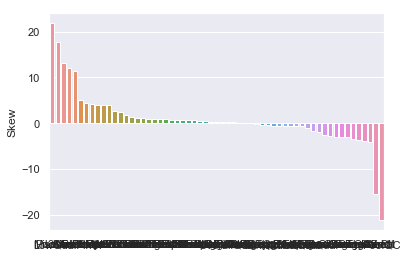

In [27]:
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

sns.barplot(skewness.index,skewness.Skew);

## Box Cox Transformation of (highly) skewed features

When you are dealing with real-world data, you are going to deal with features that are heavily skewed. Transformation technique is useful to **stabilize variance**, make the data **more normal distribution-like**, improve the validity of measures of association.

The problem with the Box-Cox Transformation is **estimating lambda**. This value will depend on the existing data, and should be considered when performing cross validation on out of sample datasets.

In [28]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_df[feat] = boxcox1p(all_df[feat], lam)

There are 59 skewed numerical features to Box Cox transform


**Getting dummy categorical features**

In [29]:
all_df = pd.get_dummies(all_df)

# shape        
print('Size of dataset after dummies: {} rows, {} columns'.format(all_df.shape[0], all_df.shape[1]))

Size of dataset after dummies: 2917 rows, 220 columns


Creating train and test data.

In [30]:
final_train_df = all_df[:ntrain]
final_test_df = all_df[ntrain:]

# shape        
print('Size of training dataset: {} rows, {} columns'.format(final_train_df.shape[0], final_train_df.shape[1]))
print('Size of testing dataset: {} rows, {} columns'.format(final_test_df.shape[0], final_test_df.shape[1]))

Size of training dataset: 1458 rows, 220 columns
Size of testing dataset: 1459 rows, 220 columns


## Lets apply Modelling

1. Importing Libraries

2. We will use models
 - Lasso
 - Ridge
 - ElasticNet
 - Gradient Boosting
 
3. Find the Cross Validation Score.
4. Calculate the mean of all model's prediction.
5. Submit the CSV file.
 

In [31]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

C:\Users\ajana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Cross Validation
It's simple way to calculate error for evaluation. 

**KFold( )** splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

**cross_val_score ( )** evaluate a score by cross-validation.

In [32]:
#Validation function
n_folds = 5

def kfold_cv_rmsle(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmsle = np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmsle)

def kfold_cv_pred(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    y_pred = cross_val_predict(model, X.values, y, cv=kf)

    return(y_pred)

# Modelling
Since in this dataset we have a large set of features. So to make our model avoid Overfitting and noisy we will use Regularization.
These model have Regularization parameter.

Regularization will reduce the magnitude of the coefficients.

## Ridge Regression
- It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
- It reduces the model complexity by coefficient shrinkage.
- It uses L2 regularization technique.

In [33]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = kfold_cv_rmsle(KRR, final_train_df, y_train)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0074)



## Lasso Regression
LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge.

In case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes.
 Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.
 
- Lasso uses L1 regularization technique.
- Lasso is generally used when we have more number of features, because it automatically does feature selection.


In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = kfold_cv_rmsle(lasso, final_train_df, y_train)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1118 (0.0072)



## Elastic Net Regression

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters.

In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = kfold_cv_rmsle(ENet, final_train_df, y_train)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1118 (0.0073)



## Gradient Boosting Regression
Refer [here](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)

In [36]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = kfold_cv_rmsle(GBoost, final_train_df, y_train)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [37]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = kfold_cv_rmsle(model_xgb, final_train_df, y_train)
print("XGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBoost score: 0.1151 (0.0069)



In [38]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = kfold_cv_rmsle(model_lgb, final_train_df, y_train)
print("LightGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LightGBM score: 0.1162 (0.0071)



**Fit the training dataset on every model**

In [39]:
LassoMd = lasso.fit(final_train_df.values,y_train)
ENetMd = ENet.fit(final_train_df.values,y_train)
KRRMd = KRR.fit(final_train_df.values,y_train)
GBoostMd = GBoost.fit(final_train_df.values,y_train)

In [40]:
from sklearn.metrics import mean_squared_error

lasso_train_pred = LassoMd.predict(final_train_df.values)
ENet_train_pred = ENetMd.predict(final_train_df.values)
KRR_train_pred = KRRMd.predict(final_train_df.values)
GBoost_train_pred = GBoostMd.predict(final_train_df.values)

avg_train_pred = (lasso_train_pred + ENet_train_pred + KRR_train_pred + GBoost_train_pred) / 4

avg_rmsle = np.sqrt(mean_squared_error(y_train, avg_train_pred))
print("Average Model RMSLE score: {:.4f}".format(avg_rmsle))

avg_train_pred = np.expm1(avg_train_pred)
avg_train_pred

Average Model RMSLE score: 0.0800


array([207824.51588512, 181741.99474548, 219445.17026866, ...,
       258668.34584133, 139458.3183131 , 149220.04697876])

## Mean of all model's prediction.
np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array. 

In [41]:
lasso_test_pred = np.expm1(LassoMd.predict(final_test_df.values))
ENet_test_pred = np.expm1(ENetMd.predict(final_test_df.values))
KRR_test_pred = np.expm1(KRRMd.predict(final_test_df.values))
GBoost_test_pred = np.expm1(GBoostMd.predict(final_test_df.values))

finalMd = (lasso_test_pred + ENet_test_pred + KRR_test_pred + GBoost_test_pred) / 4
finalMd

array([120175.39926117, 164365.60549256, 183031.97016731, ...,
       170887.57433859, 114321.69838255, 221702.05698717])

### Out-of-Fold Predictions
Now as alluded to above in the introductory section, stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [42]:
SEED = 42 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
#kf = KFold(ntrain, n_folds=NFOLDS, random_state=SEED)

def get_oof(model, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    kf = KFold(NFOLDS, shuffle=False, random_state=42).split(final_train_df.values)

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        model.fit(x_tr, y_tr)

        oof_train[test_index] = model.predict(x_te)
        oof_test_skf[i, :] = model.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [43]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [44]:
# Create our OOF train and test predictions. These base results will be used as new features
ENet_oof_train, ENet_oof_test = get_oof(ENet, final_train_df.values, y_train, final_test_df.values)
KRR_oof_train, KRR_oof_test = get_oof(KRR, final_train_df.values, y_train, final_test_df.values)
XGB_oof_train, XGB_oof_test = get_oof(model_xgb, final_train_df.values, y_train, final_test_df.values)
#lasso_oof_train, lasso_oof_test = get_oof(lasso, x_train, y_train, x_test)

In [45]:
base_predictions_train = pd.DataFrame( {'Kernel Ridge': KRR_oof_train.ravel(),
#                                        'Lasso': lasso_oof_train.ravel(),
                                        'Elastic Net': ENet_oof_train.ravel(),
                                        'XGBoost': XGB_oof_train.ravel()
                                       } )
base_predictions_train.head()

,Kernel Ridge,Elastic Net,XGBoost
0,12.247028,12.250396,12.223845
1,12.115176,12.111913,12.066909
2,12.276630,12.290219,12.267591
3,12.044249,12.029878,12.102263
4,12.544954,12.584536,12.583114


In [46]:
x_train = np.concatenate((KRR_oof_train, ENet_oof_train, XGB_oof_train), axis=1)
x_test = np.concatenate((KRR_oof_test, ENet_oof_test, XGB_oof_test), axis=1)

In [47]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
Stacked_Model = lasso.fit(x_train, y_train)

n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
rmsle_score = np.sqrt(-cross_val_score(Stacked_Model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
print("Staked Lasso Model score: {:.4f} ({:.4f})\n".format(rmsle_score.mean(), rmsle_score.std()))

finalMd = Stacked_Model.predict(x_test)
finalMd = np.expm1(finalMd)
finalMd

Staked Lasso Model score: 0.1094 (0.0064)



array([119322.67146178, 162075.19339318, 184317.50416835, ...,
       172621.76307626, 116857.48559963, 225509.43112722])

In [49]:
from mlxtend.regressor import StackingRegressor

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

stregr = StackingRegressor(regressors=[KRR, model_xgb, ENet], 
                           meta_regressor=lasso)

stregr.fit(final_train_df, y_train)
stregr_train_pred = stregr.predict(final_train_df)

stregr_rmsle = np.sqrt(mean_squared_error(y_train, stregr_train_pred))
print("Stacking Regressor Model RMSLE score: {:.4f}".format(avg_rmsle))
print('Stacking Regressor Variance Score: %.4f' % stregr.score(final_train_df, y_train))

stregr_train_pred = np.expm1(stregr_train_pred)
stregr_train_pred

Stacking Regressor Model RMSLE score: 0.0800
Stacking Regressor Variance Score: 0.9661


array([209018.74284589, 179211.98189801, 215244.94442329, ...,
       257796.78781405, 140294.45950447, 151187.91343172])

In [50]:
stregr_test_pred = stregr.predict(final_test_df)
finalMd = np.expm1(stregr_test_pred)
finalMd

array([121847.4957988 , 178143.45234203, 186108.33701433, ...,
       167262.59571747, 111308.68566421, 226020.81065134])

## Submission

In [51]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = finalMd
sub.to_csv('kaggle_submission.csv',index=False)

**If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated.**

**I'll be glad to hear suggestions on improving my models**